# Kinetic modeling of acidogenic fermentation in a batch reactor

Acidogenic fermentation is a technology that is used to produce hydrogen and volatile fatty acids in an environmental friendly way. In an acidogenic fermentation carried out by a mixed culture,the microorganisms produce a spectrum of metabolic products. Consequently, the hydrogen yields achieved are lower than the maximum theoretical hydrogen yield (4 mol H2/mol glucose) when acetic acid is the end-product. However, mixed culture also has some advantages because no sterilization is required. Major assumption associated with this study is that the culture is well mixed. 

"Kinetic model and study of the influence of pH, temperature and undissociated acids on acidogenic fermentation" was chosen for the course project.
Citation - Infantes, D., del Campo, A. G., Villaseñor, J., & Fernández, F. J. (2012). Kinetic model and study of the influence of pH, temperature and undissociated acids on acidogenic fermentation. Biochemical engineering journal, 66, 66-72.


The following equations and info is used to describe the monod-type kinetics of acidogenic fermentation:

Let: 
- x(t) is the concentration of biomass in the reactor ($gSSV/l$). 
- s(t) is the substrate concentration ($mM$) and $s_0$ be the concentration of substrate in the feed line, is equal to 50 mM.
- mu is the specific growth rate parameter $h^{-1}$.
- ks is the substrate half saturation constant $mM$.
- b is the decay coefficient ($h^{-1}$)
- kbio is the undissociated acids threshold concentration ($mM$) which caused an important shift on biomass growth 
- ksub is the undissociated acids threshold concentration ($mM$) which caused an important shift on substrate fermentation
- CHA is the total concentration of undossociated acids ($mM$)
- Yobs is the observed biomass yield ($gssv/mM of glucose$) and is calcualted using $Yobs = Yxmax(1-m)$
- m is fraction of substrate consumed for maintenance

\begin{align}
\dot{x} = \mu \frac{s(t)}{ks+s(t)} \frac{1}{1+1.2^{(CHA - kbio)}} x(t) - b x(t)\\
\dot{s} = \frac{-1}{Yobs} \frac{s(t)}{ks+s(t)} \frac{1}{1+1.2^{(CHA - ksub)}} x(t)
\end{align}

However, there are several **unknown parameters that we need to estimate**:

- mu is the specific growth rate parameter $h^{-1}$
- ks is the substrate half saturation constant $mM$.
- b is the decay coefficient ($h^{-1}$)
- kbio is the undissociated acids threshold concentration ($mM$) which caused an important shift on biomass growth 
- ksub is the undissociated acids threshold concentration ($mM$) which caused an important shift on substrate fermentation
- m is fraction of substrate consumed for maintenance

Methodology: Experiments were performed and model results were validated in the publication. In this study, experimental data was extracted from the article and fit into the ODE model. Next, parametric sensitivity was performed globally and locally to determine which parameter is more senitive compared to the others. Finally, bifurcation analysis was performed for the chosen variable and parameter.



## Fitting experimental data

In [9]:
#Exporting the data extracted using web plot digitizer

import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint 

data = pd.read_csv("Data.csv")
data

,time(hr),x,s
0,0.154185,0.414027,49.857140
1,3.942731,0.555204,41.142860
2,13.105730,0.993213,13.857140
3,16.894270,1.253843,3.857143
4,17.995590,1.402262,2.285714
5,22.621150,1.257466,0.000001


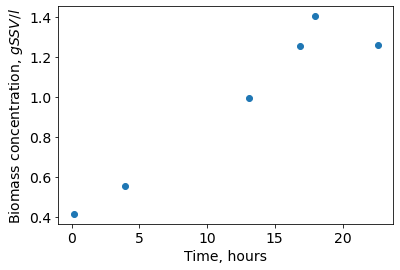

In [104]:
plt.scatter(data["time(hr)"], data["x"])
plt.xlabel('Time, hours')
plt.ylabel('Biomass concentration, $gSSV/l$')
plt.show()


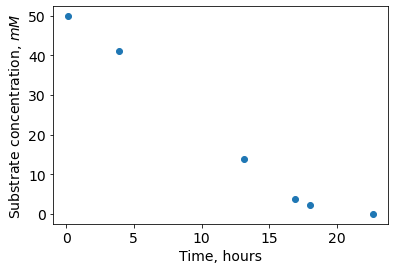

In [103]:
plt.scatter(data["time(hr)"], data["s"])
plt.xlabel('Time, hours')
plt.ylabel('Substrate concentration, $mM$')
plt.show()

In [40]:

def odes(z,t,mu,ks,b,kbio,ksub,m):  

    x = z[0]
    s = z[1]
    Yobs = (0.023)*(1-m)
    CHA = 50
    dxdt = ((mu*((s)/(ks+s))*((1)/(1+(1.2**(CHA-kbio)))))*x)-(b*x)
    dsdt = ((-1)/(Yobs))*((mu*((s)/(ks+s))*((1)/(1+(1.2**(CHA-ksub)))))*x)
 
    return [dxdt,dsdt] 

training_data = np.array([data['x'],data['s']]).T

ic = [1, 40]

In [41]:

def RMSE(params):
    mu,ks,b,kbio,ksub,m = params;
    ODE_output = odeint(odes, ic, data["time(hr)"], args = (mu,ks,b,kbio,ksub,m));
    err = training_data - ODE_output
    return np.sqrt(np.sum(err**2))  # we return the summed squared error directly

RMSE([1,1,0,1,1,0])

71.29758180026022

In [70]:
from scipy.optimize import minimize
sol = minimize(RMSE, x0 = (0.082,0.53,0.011,120,68,0));
print(sol);

      fun: 1.808527687496722
 hess_inv: array([[ 1.30447902e-02,  2.80178624e-01,  8.65530717e-03,
        -8.69100190e-04, -3.62008154e-01, -2.95443429e-01],
       [ 2.80178624e-01,  6.02331763e+00,  1.85314632e-01,
        -4.80113092e-02, -7.66939103e+00, -6.34534203e+00],
       [ 8.65530717e-03,  1.85314632e-01,  5.83384013e-03,
        -4.43458996e-04, -2.60742901e-01, -1.96440670e-01],
       [-8.69100190e-04, -4.80113092e-02, -4.43458996e-04,
         1.00285391e+00, -2.90408342e-01,  1.06398127e-02],
       [-3.62008154e-01, -7.66939103e+00, -2.60742901e-01,
        -2.90408342e-01,  1.73063604e+01,  8.44978165e+00],
       [-2.95443429e-01, -6.34534203e+00, -1.96440670e-01,
         1.06398127e-02,  8.44978165e+00,  6.70329400e+00]])
      jac: array([ 3.40907127e-02, -1.87993050e-04, -2.00450420e-02,  1.49011612e-05,
        3.17394733e-05,  7.11217523e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 719
      nit: 36
     njev: 10

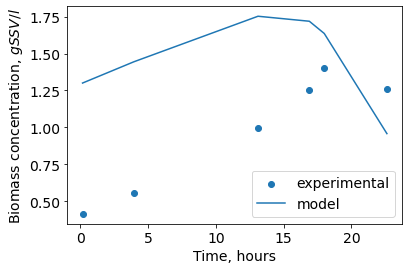

In [108]:
#plotting both the experimental and model solution data to fit the parameters for biomass concentration
plt.scatter(data["time(hr)"], data["x"], label="experimental")

new = odeint(odes, ic, data["time(hr)"], args = (sol.x[0], sol.x[1], sol.x[2], sol.x[3], sol.x[4], sol.x[5]))

plt.plot(data["time(hr)"],new.T[0], label="model")
plt.xlabel('Time, hours');
plt.ylabel('Biomass concentration, $gSSV/l$')
plt.legend()
plt.show()

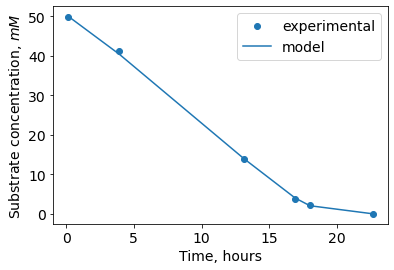

In [110]:
#plotting both the experimental and model solution data to fit the parameters for substrate concentration
plt.scatter(data["time(hr)"], data["s"],label="experimental")

new = odeint(odes, ic, data["time(hr)"], args = (sol.x[0], sol.x[1], sol.x[2], sol.x[3], sol.x[4], sol.x[5]))

plt.plot(data["time(hr)"],new.T[1], label="model")
plt.xlabel('Time, hours');
plt.ylabel('Substrate concentration, $mM$')
plt.legend()
plt.show()

## ODE solution plots

In [45]:
from scipy.integrate import odeint 
import numpy as np
import matplotlib.pyplot as plt

def odes(z,t,mu,ks,b,kbio,ksub,m):  

    x = z[0]
    s = z[1]
    Yobs = (0.023)*(1-m)
    CHA = 50
    dxdt = ((mu*((s)/(ks+s))*((1)/(1+(1.2**(CHA-kbio)))))*x)-(b*x)
    dsdt = ((-1)/(Yobs))*((mu*((s)/(ks+s))*((1)/(1+(1.2**(CHA-ksub)))))*x)
 
    return [dxdt,dsdt] 

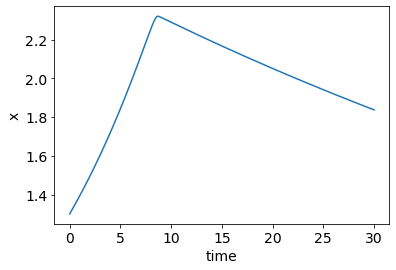

In [46]:
ic = [1.3,50]
tspan = np.linspace(0,30,1000)

mu = 0.082
ks = 0.53
b = 0.011
kbio = 120
ksub = 68
m = 0

ODE_output = odeint(odes, ic, tspan, args = (mu,ks,b,kbio,ksub,m));

# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("x")
plt.plot(tspan, (ODE_output[:,0]));
  

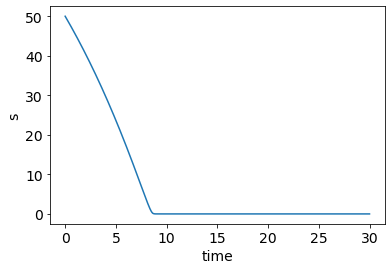

In [111]:
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("s")
plt.plot(tspan, (ODE_output[:,1]));

### Global sensitivity analysis for substrate concentration

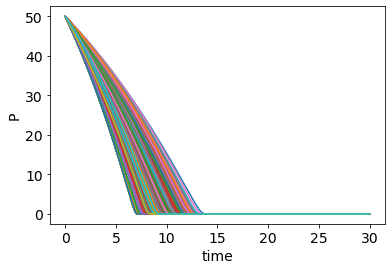

In [113]:
# generating several output for random selections of parameters
# Varying every parameter by 20%
N = 1000;
mu = np.random.uniform(0.082*.8,0.082*1.2,N)
ks = np.random.uniform(0.53*.8,0.53*1.2,N)
b = np.random.uniform(0.011*.8,0.011*1.2,N)
kbio = np.random.uniform(120*.8,120*1.2,N)
ksub = np.random.uniform(68*.8,68*1.2,N)
m = np.random.uniform(0*.8,0*1.2,N)


P = np.zeros(N);

for n in np.arange(0,N,1):
    output = odeint(odes, ic, tspan, args = (mu[n],ks[n],b[n],kbio[n],ksub[n],m[n]));
    plt.plot(tspan,output[:,1]); #plotting the sensitivity for the substrate concentration
    plt.xlabel("time");
    plt.ylabel("P");
    P[n]=output[-1,1];

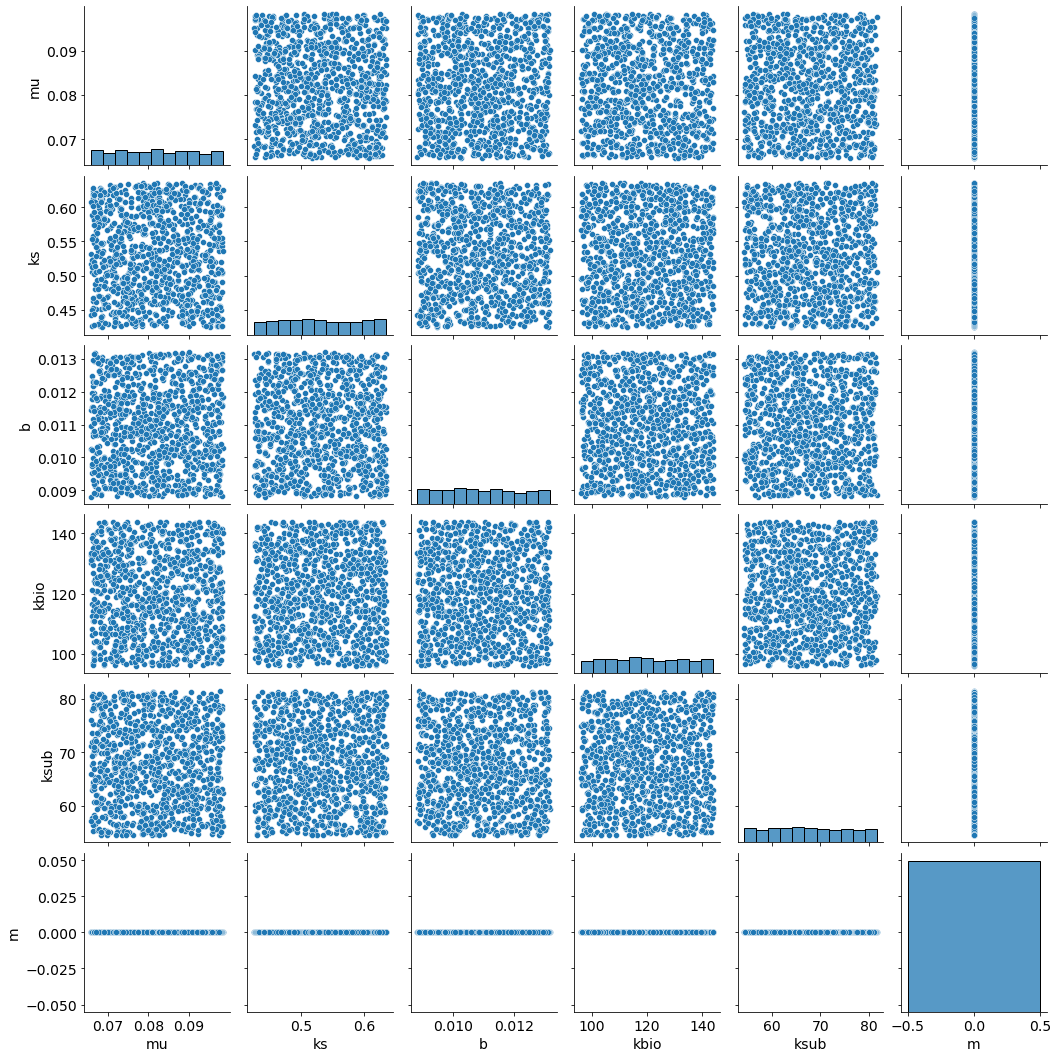

In [114]:
# Ploting histograms of sampled parameter space
import pandas as pd
import seaborn as sns

tmp = {'mu':mu, 'ks':ks, 'b':b, 'kbio':kbio, 'ksub':ksub, 'm':m};
df = pd.DataFrame(tmp);
del(tmp)

sns.pairplot(df)  
20
plt.show()

Our fitted equn is s =  0.07292141253148554 mu + -0.08440111870172992 ks + 0.4110362206289485 b 0.0514035800653371 kbio + 0.36430980281964476 ksub


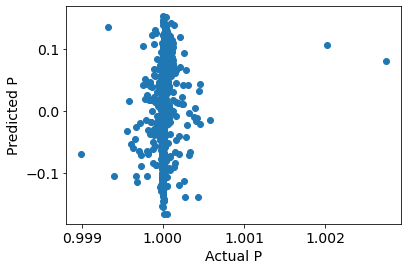

In [119]:
# Normalizing the substrate conc (s) variable
s = (0.000001-P)/0.000001; 


# Building X with Normalized values
X = np.c_[(0.082-mu)/0.082,(0.53-ks)/0.53,(0.011-b)/0.011,(120-kbio)/120,(68-ksub)/68]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ s;
print("Our fitted equn is s = ",params[0], "mu +", params[1], "ks +", params[2],"b", params[3], "kbio +", params[4], "ksub")

plt.plot(s,X @ params,"o");
plt.ylabel("Predicted P");
plt.xlabel("Actual P");

In [118]:
import statsmodels.api as sm
model = sm.OLS(s, X).fit() #performing the statistical analysis without interaction effects
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.8140
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                       0.540
Time:                        12:03:45   Log-Likelihood:                         -1416.9
No. Observations:                1000   AIC:                                      2844.
Df Residuals:                     995   BIC:                                      2868.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Local sensitivity analysis for substrate concentration

-9.098807127338205e-12


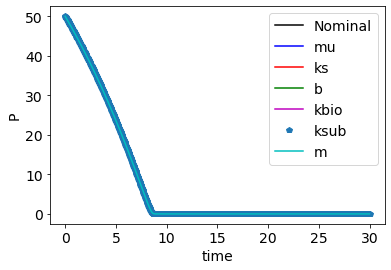

In [120]:
y = odeint(odes, ic, tspan, args = (0.082,0.53,0.011,120,68,0))
y1 = odeint(odes, ic, tspan, args = (0.082*1.01,0.53,0.011,120,68,0))
y2 = odeint(odes, ic, tspan, args = (0.082,0.53*1.01,0.011,120,68,0))
y3 = odeint(odes, ic, tspan, args = (0.082,0.53,0.011*1.01,120,68,0))
y4 = odeint(odes, ic, tspan, args = (0.082,0.53,0.011,120*1.01,68,0))
y5 = odeint(odes, ic, tspan, args = (0.082,0.53,0.011,120,68*1.01,0))
y6 = odeint(odes, ic, tspan, args = (0.082,0.53,0.011,120,68,0*1.01))



# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("P")
plt.plot(tspan, y[:,1],'k', label = "Nominal");
plt.plot(tspan, y1[:,1],'b', label = "mu");
plt.plot(tspan, y2[:,1],'r', label = "ks");
plt.plot(tspan, y3[:,1],'g', label = "b");
plt.plot(tspan, y4[:,1],'m', label = "kbio");
plt.plot(tspan, y5[:,1],'p', label = "ksub");
plt.plot(tspan, y6[:,1],'c', label = "m");
plt.legend()

# PRint the final value of P for our nominal parameter set. This will be needed later.
print(y[-1,1])

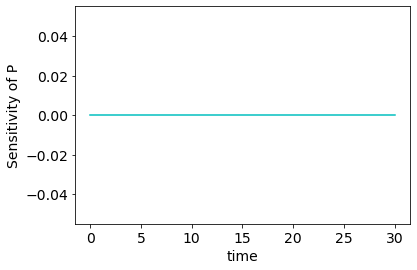

In [87]:
# # Plot the numerical solution
# plt.rcParams.update({'font.size': 14})  # increase the font size
# plt.xlabel("time")
# plt.ylabel("Sensitivity of P")
# # plt.plot(tspan, ((y1[:,1] - y[:,1])/y[:,1])/0.01,'b', label = "mu");
# #plt.plot(tspan, ((y2[:,1] - y[:,1])/y[:,1])/0.01,'r', label = "ks");
# #plt.plot(tspan,((y3[:,1] - y[:,1])/y[:,1])/0.01,'g', label = "b");
# #plt.plot(tspan,((y4[:,1] - y[:,1])/y[:,1])/0.01,'m', label = "kbio");
# #plt.plot(tspan,((y5[:,1] - y[:,1])/y[:,1])/0.01,'m', label = "ksub");
# #plt.plot(tspan,((y6[:,1] - y[:,1])/y[:,1])/0.01,'c', label = "m");
# # # plt.legend()


### Bifurcation analysis for the substrate concentration using the most sensitive parameter

(0.06, 0.11)

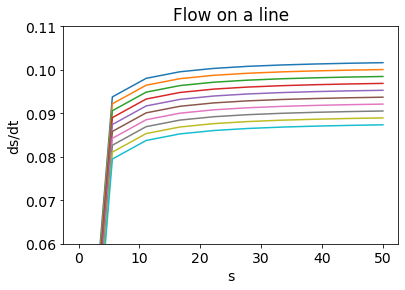

In [135]:
def odes1(z,mu,ks,b,kbio,ksub,m):  

    x = z[0]
    s = z[1]
    Yobs = (0.023)*(1-m)
    CHA = 50
    dxdt = ((mu*((s)/(ks+s))*((1)/(1+(1.2**(CHA-kbio)))))*x)-(b*x)
    dsdt = ((-1)/(Yobs))*((mu*((s)/(ks+s))*((1)/(1+(1.2**(CHA-ksub)))))*x)
 
    return [dxdt,dsdt] 

mu = 0.082
ks = 0.53
kbio = 68
ksub = 120
m = 0

b = np.linspace(0.00001, 0.011,10)

x_values = np.linspace(1.3,1.3,10)
s_values = np.linspace(0,50,10)

for n in b:

    plt.plot(s_values,odes1(np.array([x_values,s_values]),mu,ks,n,kbio,ksub,m)[0])

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("s")
plt.ylabel("ds/dt")
plt.title("Flow on a line")
plt.ylim(0.06, 0.11) # zoom in as necessary
